<a href="https://colab.research.google.com/github/Shikha0412/Spotify_ShikhaV/blob/main/Spotify_ShikhaV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem statement:

Given the artists file of the spotify dataset , the aim is to predict an artist's polpularity based on the other features related to them , comparing and choosing the most accurate machine learning model.

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Changed skylearn to sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline # Changed skylearn to sklearn
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
%matplotlib inline

# Loading Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/shikha_verma_2024UCA1803/Database/archive (2)/artists.csv')

# Exploring the data

In [ ]:
df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162092 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


In [ ]:
df.describe()

,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


In [ ]:
df.shape

(1162095, 5)

# Checking For and handling missing values

In [ ]:
df.isnull().sum()

,0
id,0
followers,11
genres,0
name,3
popularity,0


Null values in columns followers and name.

Replacing null values in name column with 'Unknows'.

Replacing null values in followers column with mean of values in the column.

In [ ]:
df.fillna({'name':'Unknown'},inplace=True)
df.fillna({'followers':df['followers'].mean()},inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
followers,0
genres,0
name,0
popularity,0


# EDA

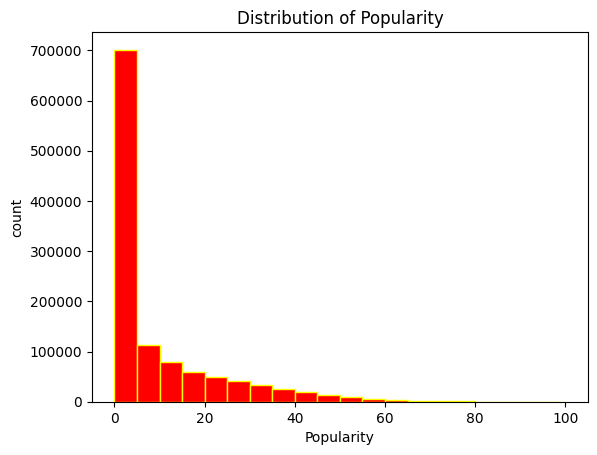

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['popularity'], bins=20 , color='red', edgecolor='yellow')
plt.xlabel('Popularity')
plt.ylabel('count')
plt.title('Distribution of Popularity')
plt.show()

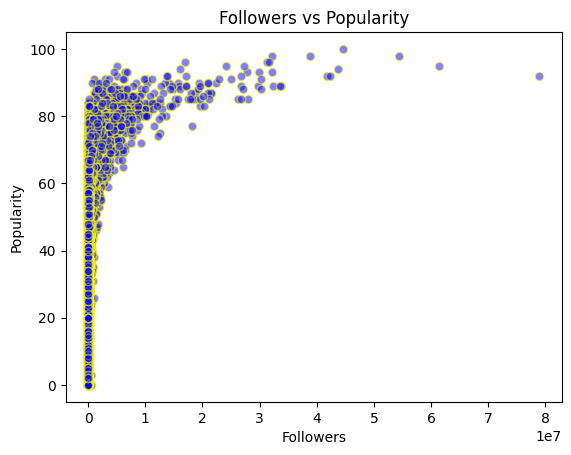

In [ ]:
plt.scatter(df['followers'], df['popularity'], color='blue', alpha=0.5 , edgecolor='yellow')
plt.xlabel('Followers')
plt.ylabel('Popularity')
plt.title('Followers vs Popularity')
plt.show()

# Feature engineering

Encoding using Label Encoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/shikha_verma_2024UCA1803/Database/archive (2)/artists.csv')
encoder = LabelEncoder()
df['genres_encoded'] = encoder.fit_transform(df['genres'])
df.drop(columns=['genres'], axis = 1, inplace = True)

In [ ]:
df['name_encoded'] = encoder.fit_transform(df['name'])
df.drop(columns=['name'], axis = 1, inplace = True)

In [ ]:
df['id_encoded'] = encoder.fit_transform(df['id'])
df.drop(columns=['id'], axis = 1, inplace = True)

In [ ]:

df.fillna({'followers':df['followers'].mean()},inplace=True)
print
print(df.isna().sum())

followers         0
popularity        0
genres_encoded    0
name_encoded      0
id_encoded        0
dtype: int64


# Trai-test split



Split the dataset into 80% training and 20% testing using train_test_split() from sklearn.model_selection.





In [ ]:

x = df.drop('popularity', axis=1)
y = df['popularity']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



Normalization

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Comparing Different Machine learning Models

In [ ]:
models={"Linear Regression": LinearRegression(),
        "KNN": KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)}


Getting the accuracy of the models.

Using dictionary to store the results with the models names as keys and values as nested dictionaries with keys as the repective matrics for coparison and values as the values of the matrics.

In [ ]:
results={}
for (Model_name,model) in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  results[Model_name]={"MSE":mse,"R2":r2}
  print(f"{Model_name} MSE: {mse}")
  print(f"{Model_name} R2: {r2}")



Linear Regression MSE: 151.0530653824596
Linear Regression R2: 0.17549427384700356
KNN MSE: 108.60556976839243
KNN R2: 0.4071890302959291
Decision Tree MSE: 107.10717712407333
Decision Tree R2: 0.41536783363327656
Random Forest MSE: 55.61983395075273
Random Forest R2: 0.6964055548031294
XGBoost MSE: 52.175010681152344
XGBoost R2: 0.7152087092399597


Creating a dataframe from results dictionary.

In [ ]:
results_df=pd.DataFrame(results).T
results_df

,MSE,R2
Linear Regression,151.053065,0.175494
KNN,108.605570,0.407189
Decision Tree,107.107177,0.415368
Random Forest,55.619834,0.696406
XGBoost,52.175011,0.715209


Checking and printing best model

In [ ]:
best_model_name = results_df["R2"].idxmax()
best_model=models[best_model_name]
best_model_name


'XGBoost'

Visualization of $r^2$ comparison

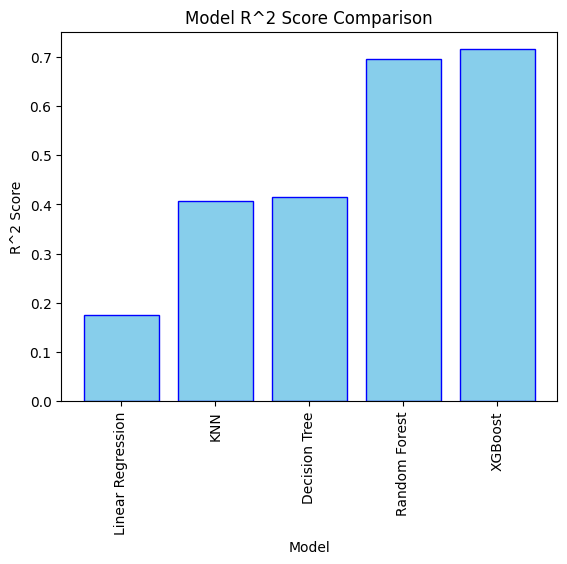

In [ ]:
plt.bar(results_df.index, results_df['R2'], color='skyblue' , edgecolor= 'blue' )
plt.title('Model R^2 Score Comparison')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.xticks(rotation=90)
plt.show()